# Thematic Summary — Task 2

This notebook summarizes the thematic analysis produced by `scripts/sentiment_thematic.py` (output: `data/processed/reviews_thematic.csv`).

It shows theme counts overall and per bank, and displays example reviews for each theme. Run cells in order.

In [ ]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = Path('../data/processed/reviews_thematic.csv')
assert DATA_PATH.exists(), f'Expected {DATA_PATH} to exist. Run the pipeline first.'
df = pd.read_csv(DATA_PATH)
print('Loaded', DATA_PATH, '->', df.shape)
df.head()

Loaded ..\data\processed\reviews_thematic.csv -> (966, 7)


,review_id,review_text,bank,rating,sentiment_label,sentiment_score,identified_themes
0,0,i don't find it good and now it is not working!,BOA,1,neg,-0.4015,Other
1,1,Make the reason we wrote visible on app transa...,BOA,2,neu,0.0000,User Interface & Experience;Other
2,2,app is note active working crash,BOA,1,neu,0.0000,User Interface & Experience;Other
3,3,🙏👍,BOA,5,neu,0.0000,Other
4,4,Very Good,BOA,5,pos,0.4927,Other


In [3]:
# Normalize `identified_themes` into rows and compute counts
themes_series = df['identified_themes'].fillna('')
rows = []
for i, val in themes_series.items():
    for t in str(val).split(';'):
        t = t.strip()
        if t:
            rows.append({'review_id': i, 'theme': t, 'bank': df.at[i, 'bank']})
theme_df = pd.DataFrame(rows)
# Overall theme counts
theme_counts = theme_df['theme'].value_counts()
print('Top themes overall:')
print(theme_counts.head(20))

# Per-bank theme counts (top 10 each)
for bank in sorted(df['bank'].unique()):
    sub = theme_df[theme_df['bank'] == bank]
    print(f'Top themes for {bank}:')
    print(sub['theme'].value_counts().head(10))

Top themes overall:
theme
Other                          913
User Interface & Experience    396
Transaction Performance         46
Name: count, dtype: int64
Top themes for BOA:
theme
Other                          338
User Interface & Experience    128
Transaction Performance         13
Name: count, dtype: int64
Top themes for CBE:
theme
Other                          284
User Interface & Experience    108
Transaction Performance         20
Name: count, dtype: int64
Top themes for DASHEN:
theme
Other                          291
User Interface & Experience    160
Transaction Performance         13
Name: count, dtype: int64


C:\Users\nesre\AppData\Local\Temp\ipykernel_27280\2941729444.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=theme_counts.head(15).values, y=theme_counts.head(15).index, palette='coolwarm')


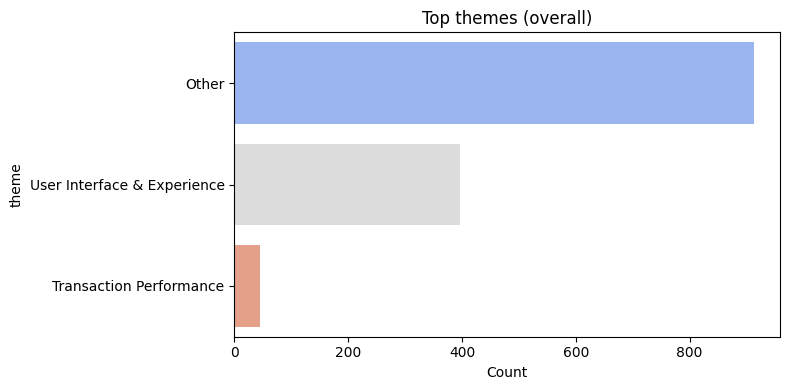

In [4]:
# Plot top themes overall
plt.figure(figsize=(8,4))
sns.barplot(x=theme_counts.head(15).values, y=theme_counts.head(15).index, palette='coolwarm')
plt.title('Top themes (overall)')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

In [5]:
# Show example reviews per top theme (3 examples each)
examples = {}
for theme in theme_counts.head(10).index:
    matched_ids = theme_df[theme_df['theme'] == theme]['review_id'].unique()[:50]
    examples[theme] = df.loc[matched_ids, ['review_text','rating','sentiment_label','sentiment_score']].head(3)

for theme, exdf in examples.items():
    print(f'=== Theme: {theme} (examples) ===')
    if exdf.empty:
        print('  (no examples)')
    else:
        for _, r in exdf.iterrows():
            print(f"- ({r['rating']}) [{r['sentiment_label']} {r['sentiment_score']}] {r['review_text'][:200]}")

=== Theme: Other (examples) ===
- (1) [neg -0.4015] i don't find it good and now it is not working!
- (2) [neu 0.0] Make the reason we wrote visible on app transaction.
- (1) [neu 0.0] app is note active working crash
=== Theme: User Interface & Experience (examples) ===
- (2) [neu 0.0] Make the reason we wrote visible on app transaction.
- (1) [neu 0.0] app is note active working crash
- (1) [neg -0.8834] I cant belive I could find the worst bank app ever .yet very simple to fix the problem and the company just ignored it. no body can do business with this kind of app.
=== Theme: Transaction Performance (examples) ===
- (1) [pos 0.4969] i m sorry but it doesn't work for my android it is too slow but other bank are very fast please update
- (1) [neu -0.0258] I kindly request that Bank of abyssinia address issues with its mobile app. It is very slow, has numerous problems, and frequently experiences downtime. The user experience is also poor. Thank you.
- (1) [neg -0.9107] the worst ban

In [6]:
# Save outputs (plot + examples text) to notebooks/outputs/
out = Path('notebooks/outputs')
out.mkdir(parents=True, exist_ok=True)
# save the theme barplot
plt.figure(figsize=(8,4))
sns.barplot(x=theme_counts.head(15).values, y=theme_counts.head(15).index, palette='coolwarm')
plt.title('Top themes (overall)')
plt.tight_layout()
plt.savefig(out / 'summary_top_themes.png', dpi=150)
plt.close()
# save examples to text file
with open(out / 'summary_examples.txt', 'w', encoding='utf-8') as fh:
    for theme, exdf in examples.items():
        fh.write(f'=== Theme: {theme} ===\n')
        if exdf.empty:
            fh.write(' (no examples)\n')
        else:
            for _, r in exdf.iterrows():
                fh.write(f"- ({r['rating']}) [{r['sentiment_label']} {r['sentiment_score']}] {r['review_text'][:300]}\n")
        fh.write('\n')
print('Saved summary outputs to', out)

Saved summary outputs to notebooks\outputs


C:\Users\nesre\AppData\Local\Temp\ipykernel_27280\4138992020.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=theme_counts.head(15).values, y=theme_counts.head(15).index, palette='coolwarm')
